In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# INSTALLING REQUIRED LIBRARIES
!pip install -U pyproj -q
!pip install -U utm -q
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 21.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.3.3, but you have tornado 6.4.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
# !earthengine authenticate
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [ ]:
import ee
import wxee
#wxee.Initialize()

In [ ]:
lat_diff = 0
lon_diff = 0
aoi = ee.Geometry.Polygon(
        [[[-125, 32],
          [-113, 32],
          [-113, 42],
          [-125, 42]]])
# aoi = ee.Geometry.Polygon(

In [ ]:
coords = aoi.coordinates().getInfo()[0]
coords

[[-125, 32], [-113, 32], [-113, 42], [-125, 42], [-125, 32]]

In [ ]:
start_date = '2024-06-29'
end_date = '2024-07-04'
dataset = ee.ImageCollection('NASA/GSFC/MERRA/flx/2') \
            .filterDate(start_date, end_date).select('PBLH')
ds_pbl_merra2 = dataset.wx.to_xarray(region=aoi.bounds(), scale=69375)

Requesting data:   0%|          | 0/120 [00:00<?, ?it/s]

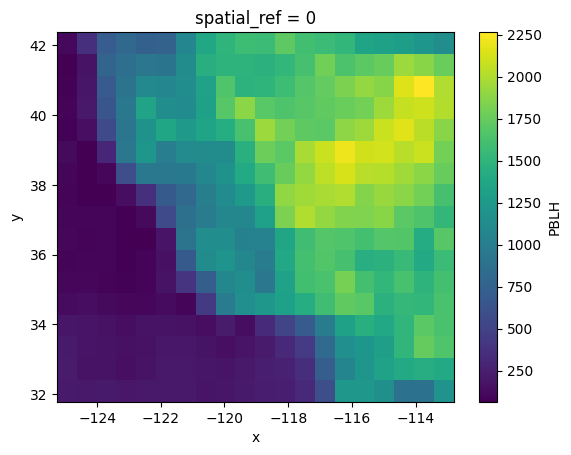

In [ ]:
ds_pbl_merra2.PBLH.mean(dim='time').plot()

In [ ]:
ds_pbl_merra2.to_netcdf('pbl_california_29jun_4jul2024.nc')

In [ ]:
ds_pbl_merra2

<xarray.Dataset> Size: 164kB
Dimensions:      (time: 120, x: 20, y: 17)
Coordinates:
  * time         (time) datetime64[ns] 960B 2024-06-29 ... 2024-07-03T23:00:00
  * x            (x) float64 160B -125.0 -124.3 -123.7 ... -114.4 -113.7 -113.1
  * y            (y) float64 136B 42.07 41.44 40.82 40.2 ... 33.34 32.72 32.1
    spatial_ref  int64 8B 0
Data variables:
    PBLH         (time, y, x) float32 163kB 180.9 682.7 ... 2.002e+03 2.282e+03
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0